# ML for NLP Project #
### By Ramzi Chariag ###

In this project, I will generate a list of the main characters of Goethe's Faust, and the network that reflects their relationships. 

In [299]:
import textract
import PyPDF2
import spacy
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
faust_textract = textract.process('faust/faust_pages_deleted.pdf',language='eng')
faust_pypdf = open('faust/faust_pages_deleted.pdf', 'rb')

In [3]:
pdfReader = PyPDF2.PdfFileReader(faust_pypdf)
page = pdfReader.getPage(0)

In [118]:
faust_txt = ''
for i in range(pdfReader.numPages):
    faust_txt=faust_txt + "\n" + pdfReader.getPage(i).extractText()


In [5]:
print(faust_txt)


Part I: Prologue In Heaven 
 (God, the Heavenly Hosts, and then Mephistopheles.
)  (The Three Archangels step forward.)  Raphael  The Sun sings out, in ancient mode, His note among his brother-spheres, 
And ends his pre-determined road,      245 
With peals of thunder for our ears. The sight of him gives Angels power, 
Though none can understand the way: 
The inconceivable work is ours, As bright as on the primal day.       250 
 
 Gabriel  And swift, and swift, beyond conceiving, 
The splendour of the Earth turns round, A Paradisial light is interleaving, 
With night™s awesome profound. 

The ocean breaks with shining foam,      255 
Against the rocky cliffs deep base, 
And rock and ocean whirl and go, 
In the spheres™ swift eternal race. 
 Michael  And storms are roaring in their race From sea to land, and land to sea,      260 
Their raging forms a fierce embrace,  
All round, of deepest energy. 
The lightning™s devastations blaze 

Along the thunder-crashes™ way: 
Yet, Lord, your 

In [6]:
# "en_core_web_sm" works with the current version of spacy, which I used in this first part of the project
nlp = spacy.load("en_core_web_sm")

In [7]:
nlp.get_pipe("ner")

In [8]:
faust_nlp = nlp(faust_txt)

In [9]:
faust_nlp.ents

(Prologue In Heaven 
  ,
 Mephistopheles,
 Three,
 Raphael  The Sun,
 245,
 the primal day,
 250,
 Gabriel,
 Earth,
 Paradisial,
 night,
 255,
 Michael,
 260,
 265,
 day,
 Three,
 the primal day,
 270,
 275,
 280,
 Earth,
 Heavenly,
 285,
 Grace,
 290,
 Earth,
 295,
 these days,
 first,
 Mephistopheles,
 300,
 Earth,
 305,
 310,
 the coming years,
 Mephistopheles,
 Earth,
 315,
 Mephistopheles,
 320,
 325,
 330,
 335,
 340,
 345,
 Embrace,
 Archangels,
 Mephistopheles,
 350,
 Gentleman,
 Chats,
 Gothic,
 Faust,
 355,
 ten years,
 Joy,
 370,
 375,
 Magic,
 385,
 390,
 395,
 400,
 Worm,
 405,
 Glass,
 Stuffed,
 410,
 Nature,
 415,
 Isn,
 420,
 Soar,
 Book,
 Macrocosm,
 430,
 Nature,
 Nature      ,
 440,
 Rise,
 445,
 morning,
 Symbol,
 One,
 Golden,
 450,
 Earth,
 Nature,
 455,
 Earth,
 Earth,
 Earth,
 Earth,
 465,
 Moon,
 Œ Horror  
 Flickers,
 475,
 480,
 485,
 Grips,
 Superhuman,
 490,
 Faust,
 495,
 Trembles,
 500,
 505,
 Time,
 510,
 Overwhelmed,
 515,
 520,
 Wagner,
 Greek,
 525,
 

In [10]:
print(faust_nlp.ents[0], faust_nlp.ents[0].label_)

Prologue In Heaven 
  ORG


First, I use the most naive method possible, in which characters are detected if they are labelled as 'person' by spacy's NER algorithm. 
Since this algorithm will label many things that are not people as 'person', a naive way to overcome this is to record only the entities that are recognized as a 'person' more than once. 

In [11]:
named_entities = dict()
persons = []
for i in range(0, len(faust_nlp.ents)):
    named_entities[str(faust_nlp.ents[i])] = faust_nlp.ents[i].label_
    if faust_nlp.ents[i].label_=='PERSON':
        persons.append(str(faust_nlp.ents[i]))


In [ ]:
from spacy import displacy

displacy.render(faust_nlp, style="ent")

In [13]:
persons

['Mephistopheles',
 'Gabriel',
 'Michael',
 'Mephistopheles',
 'Mephistopheles',
 'Mephistopheles',
 'Embrace',
 'Mephistopheles',
 'Joy',
 'Worm',
 'Glass',
 'Stuffed',
 'Soar',
 'Nature',
 'Rise',
 'Moon',
 'Œ Horror  \nFlickers',
 'Grips',
 'Superhuman',
 'Trembles',
 'Don',
 'Wagner  Pardon',
 'Angel',
 'Blissful Beloved',
 'Fraternally',
 'Beggar',
 'Don',
 'Daughter  Agatha',
 'Saint Andrew',
 'Ramparts',
 'Tormenting',
 'Queen',
 'Isn',
 'Opens',
 'Sniffs',
 'Don',
 '‚',
 '‚',
 '‚',
 '‚',
 'Don',
 'Don',
 'Shine',
 'Spellbound',
 'Don',
 'Don',
 'Don',
 'Mephistopheles',
 'Mephistopheles',
 'Mephistopheles',
 'Cheerfully',
 'Mephistopheles  Yet Death',
 'Appearance',
 '‚',
 'Curse Mammon',
 'Brighter',
 'Mephistopheles  Such',
 '‚Ah',
 'Frustration',
 'Mephistopheles',
 'Mephistopheles  Use',
 'Wandering',
 'Mephistopheles  You',
 'Law',
 'Dragged',
 'Mephistopheles  Why',
 'Mephistopheles',
 'Eritis',
 'Deus',
 'Rotten',
 '‚Slip',
 'Slip',
 'Luther',
 'Siebel',
 'Rippach',
 'Ha

In [14]:
persons_count = dict()
main_characters = []

for i in range(len(persons)):
    if persons[i] not in persons_count:
        persons_count[persons[i]] = 1
    else:
        persons_count[persons[i]]+= 1
        if persons[i] not in main_characters:
            main_characters.append(persons[i]) 
persons_count 

{'Mephistopheles': 88,
 'Gabriel': 1,
 'Michael': 1,
 'Embrace': 1,
 'Joy': 1,
 'Worm': 1,
 'Glass': 1,
 'Stuffed': 1,
 'Soar': 3,
 'Nature': 5,
 'Rise': 4,
 'Moon': 13,
 'Œ Horror  \nFlickers': 1,
 'Grips': 1,
 'Superhuman': 1,
 'Trembles': 1,
 'Don': 33,
 'Wagner  Pardon': 1,
 'Angel': 2,
 'Blissful Beloved': 1,
 'Fraternally': 1,
 'Beggar': 1,
 'Daughter  Agatha': 1,
 'Saint Andrew': 1,
 'Ramparts': 1,
 'Tormenting': 1,
 'Queen': 3,
 'Isn': 1,
 'Opens': 1,
 'Sniffs': 1,
 '‚': 42,
 'Shine': 2,
 'Spellbound': 1,
 'Cheerfully': 1,
 'Mephistopheles  Yet Death': 1,
 'Appearance': 1,
 'Curse Mammon': 1,
 'Brighter': 2,
 'Mephistopheles  Such': 3,
 '‚Ah': 1,
 'Frustration': 1,
 'Mephistopheles  Use': 1,
 'Wandering': 1,
 'Mephistopheles  You': 2,
 'Law': 1,
 'Dragged': 1,
 'Mephistopheles  Why': 1,
 'Eritis': 1,
 'Deus': 1,
 'Rotten': 1,
 '‚Slip': 1,
 'Slip': 1,
 'Luther': 1,
 'Siebel': 4,
 'Rippach': 1,
 'Hans': 1,
 'Mephistopheles  ‚All': 1,
 'Altmayer': 1,
 'Frenchman': 2,
 'Tokay': 1,


In [15]:
main_characters 

['Mephistopheles',
 'Don',
 '‚',
 'Siebel',
 'Frenchman',
 'Mephistopheles  ',
 'Margaret',
 'Nature',
 'Martha',
 'Gretchen',
 'Angel',
 'Moon',
 'don',
 'Margaret \n ',
 'Mephistopheles  You',
 'Valentine',
 'Choir',
 'Witches',
 'Oberon',
 'Blocksberg',
 'Œ Ah',
 'Rise',
 'Alpine',
 'Herald',
 'Flower',
 'Mephistopheles  Such',
 'Helen',
 'Sun',
 'Astrologer',
 'Hurry',
 'Gryphons',
 'Hercules',
 'Argonauts',
 'Grace',
 'Manto',
 'Atlas',
 'Seismos',
 'Empusa',
 'Shine',
 'Sweet Luna',
 'Thales',
 'Zeus',
 'Castor',
 'Eurotas',
 'Soar',
 'Achilles',
 'Queen',
 'Rhea',
 'Helen  ',
 'Drawn',
 'Eros',
 'Venus',
 'Quick',
 'Ghibelline',
 'Pope',
 'Baucis',
 'Kneel',
 'Quickly',
 'Brighter',
 'Bliss',
 'Mother']

There are some entries on the list that should not be there. Since they are not many, I will remove them manually

In [16]:

main_characters.remove('Œ Ah')
main_characters.remove('‚')
main_characters.remove('Mephistopheles  You')
main_characters.remove('Mephistopheles  ')
main_characters.remove('Margaret \n ')
main_characters.remove('Mephistopheles  Such')
main_characters.remove('Sun')
main_characters.remove('Moon')
main_characters.append('Faust')

In [90]:
main_characters

['Mephistopheles',
 'Don',
 'Siebel',
 'Frenchman',
 'Margaret',
 'Nature',
 'Martha',
 'Gretchen',
 'Angel',
 'don',
 'Valentine',
 'Choir',
 'Witches',
 'Oberon',
 'Blocksberg',
 'Rise',
 'Alpine',
 'Herald',
 'Flower',
 'Helen',
 'Astrologer',
 'Hurry',
 'Gryphons',
 'Hercules',
 'Argonauts',
 'Grace',
 'Manto',
 'Atlas',
 'Seismos',
 'Empusa',
 'Shine',
 'Sweet Luna',
 'Thales',
 'Zeus',
 'Castor',
 'Eurotas',
 'Soar',
 'Achilles',
 'Queen',
 'Rhea',
 'Helen  ',
 'Drawn',
 'Eros',
 'Venus',
 'Quick',
 'Ghibelline',
 'Pope',
 'Baucis',
 'Kneel',
 'Quickly',
 'Brighter',
 'Bliss',
 'Mother',
 'Faust']

Next, I will generate the network by creating a connection between two characters if they are mentioned in the same sentence

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [164]:
faust_lines = faust_txt.split("\n")

In [ ]:
for line in faust_lines:
    line = line.replace('.','')
faust_lines

In [166]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [171]:
import networkx as nx

In [295]:
sentiment_lines = []
pairs = []
G = nx.Graph()
G.add_nodes_from(main_characters)
for line in faust_lines:
    if len(intersection(main_characters,line.split()))>1:
        pair = intersection(main_characters,line.split())
        G.add_edge(pair[0],pair[1])
        sentiment_lines.append(line)
        pairs.append(pair)

In [284]:
pairs_str = []
for pair in pairs:
    if len(pair) == 2:
        pairs_str.append(pair[0]+'_'+pair[1])
    elif len(pair) == 3:
        pairs_str.append(pair[0]+'_'+pair[1]+'_'+pair[2])
    elif len(pair) == 4:
        pairs_str.append(pair[0]+'_'+pair[1]+'_'+pair[2]+'_'+pair[3])

In [285]:
pairs_str

['Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Nature',
 'Mephistopheles_Faust',
 'Mephistopheles_Siebel',
 'Mephistopheles_Siebel',
 'Mephistopheles_Siebel',
 'Mephistopheles_Siebel',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Don_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Margaret_Martha',
 'Mephistopheles_Martha',
 'Mephistopheles_Martha',
 'Mephistopheles_Martha',
 'Mephistopheles_Martha',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Faust',
 'Mephistopheles_Martha',
 'Margaret_Faust',
 'Mephistopheles_Martha',
 'Margaret_Faust',
 'Margaret_Faust',
 'Mephistopheles_Martha',
 'Martha_Faust',
 'Margaret_Martha',
 'Mephistopheles_Margaret',
 'Mephistopheles_

In [286]:
sentiment_summary = pd.DataFrame(sentiment_lines, columns =['sentences'])
sentiment_summary['pairs'] = pairs
sentiment_summary['pairs_str'] = pairs_str
sentiment_summary

,sentences,pairs,pairs_str
0,Faust This was the dog™s core! A wandering sc...,"[Mephistopheles, Faust]",Mephistopheles_Faust
1,"You certainly made me sweat, in style. Faust ...","[Mephistopheles, Faust]",Mephistopheles_Faust
2,"Mephistopheles The dog saw nothing, in his a...","[Mephistopheles, Faust]",Mephistopheles_Faust
3,Faust Enter! Mephistopheles Three times y...,"[Mephistopheles, Faust]",Mephistopheles_Faust
4,Mephistopheles Yet Death™s a guest who™s vis...,"[Mephistopheles, Faust]",Mephistopheles_Faust
...,...,...,...
78,Mephistopheles What™s that to me! Let Nature ...,"[Mephistopheles, Nature]",Mephistopheles_Nature
79,Faust Sardanapalus! Modern and rural! Mephi...,"[Mephistopheles, Faust]",Mephistopheles_Faust
80,"Faust I™ll win power, and property! The deed...","[Mephistopheles, Faust]",Mephistopheles_Faust
81,Faust What can we do? Mephistopheles ...,"[Mephistopheles, Faust]",Mephistopheles_Faust


In [289]:
sentiment_summary['polarity_score'] = sentiment_summary['sentences'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
sentiment_summary['neutral'] = sentiment_summary['sentences'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
sentiment_summary['negative'] = sentiment_summary['sentences'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
sentiment_summary['positive'] = sentiment_summary['sentences'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

In [290]:
sentiment_summary

,sentences,pairs,pairs_str,polarity_score,neutral,negative,positive
0,Faust This was the dog™s core! A wandering sc...,"[Mephistopheles, Faust]",Mephistopheles_Faust,0.4738,0.882,0.000,0.118
1,"You certainly made me sweat, in style. Faust ...","[Mephistopheles, Faust]",Mephistopheles_Faust,0.3400,0.833,0.000,0.167
2,"Mephistopheles The dog saw nothing, in his a...","[Mephistopheles, Faust]",Mephistopheles_Faust,-0.8442,0.828,0.172,0.000
3,Faust Enter! Mephistopheles Three times y...,"[Mephistopheles, Faust]",Mephistopheles_Faust,0.0000,1.000,0.000,0.000
4,Mephistopheles Yet Death™s a guest who™s vis...,"[Mephistopheles, Faust]",Mephistopheles_Faust,-0.4936,0.654,0.225,0.121
...,...,...,...,...,...,...,...
78,Mephistopheles What™s that to me! Let Nature ...,"[Mephistopheles, Nature]",Mephistopheles_Nature,0.0000,1.000,0.000,0.000
79,Faust Sardanapalus! Modern and rural! Mephi...,"[Mephistopheles, Faust]",Mephistopheles_Faust,0.2695,0.862,0.000,0.138
80,"Faust I™ll win power, and property! The deed...","[Mephistopheles, Faust]",Mephistopheles_Faust,0.8497,0.571,0.124,0.305
81,Faust What can we do? Mephistopheles ...,"[Mephistopheles, Faust]",Mephistopheles_Faust,0.0000,1.000,0.000,0.000


In [293]:
pair_sentiment = sentiment_summary.groupby(['pairs_str'])['polarity_score','neutral', 'positive', 'negative'].mean()
pair_sentiment

,polarity_score,neutral,positive,negative
pairs_str,,,,
Achilles_Faust,-0.359500,0.884000,0.000000,0.116000
Helen_Faust,0.436380,0.722600,0.252800,0.024600
Helen_Hurry,0.102700,0.854000,0.077000,0.069000
Margaret_Faust,0.271138,0.768846,0.194077,0.037077
Margaret_Martha,0.000000,1.000000,0.000000,0.000000
Martha_Faust,0.017950,0.798500,0.083000,0.118500
Mephistopheles_Don_Faust,0.128000,0.836000,0.091000,0.073000
Mephistopheles_Faust,0.083666,0.863488,0.083537,0.052976
Mephistopheles_Margaret,0.000000,1.000000,0.000000,0.000000


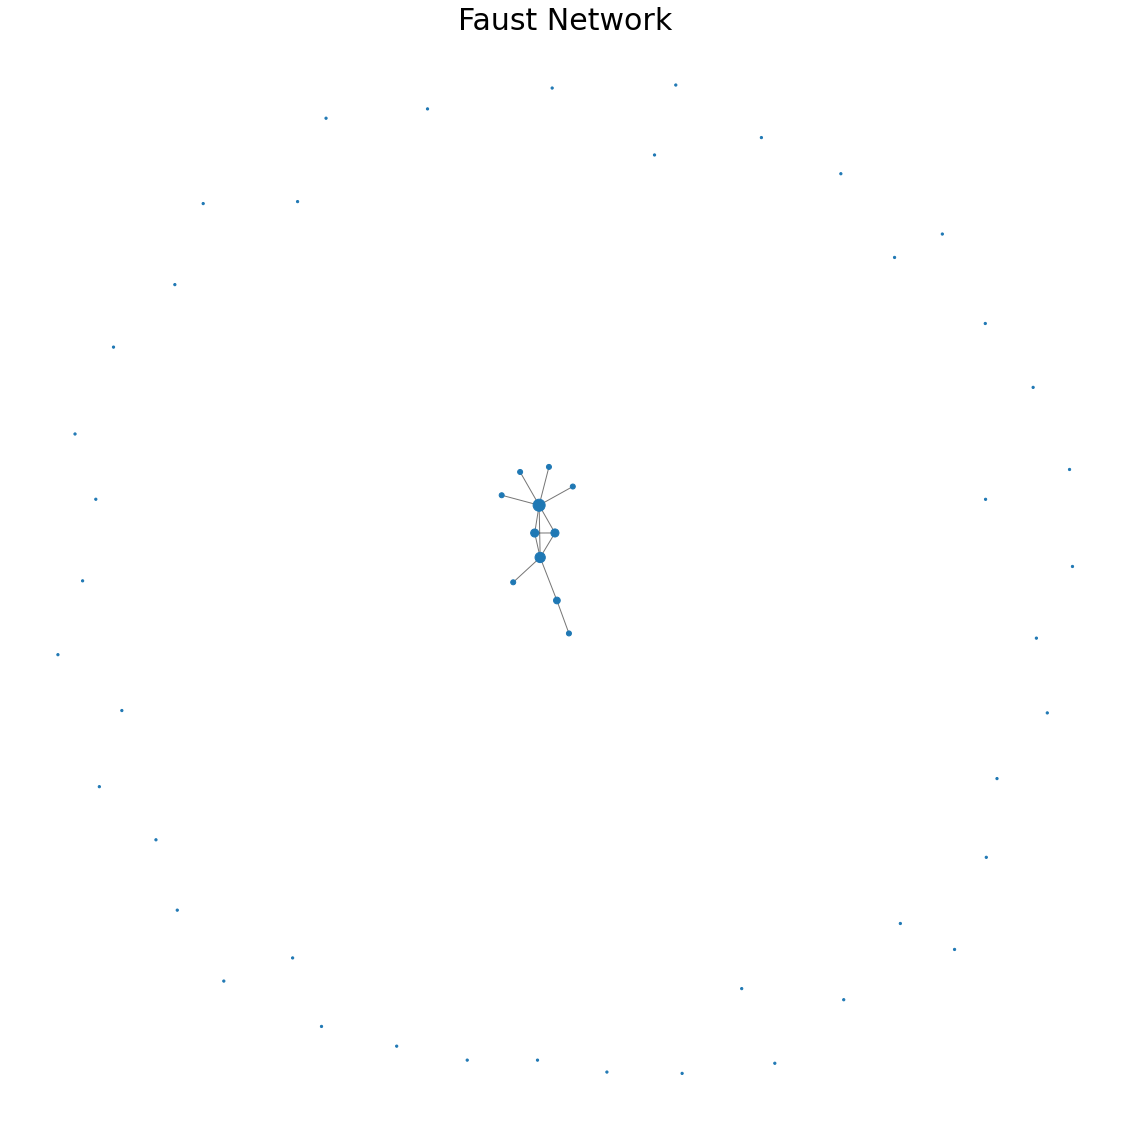

In [308]:
pos = nx.spring_layout(G)

plt.figure(figsize=(20,20))

sizes = [ 20*G.degree[node]+5 for node in G.nodes]



s = nx.draw_networkx_nodes(G, pos, node_size=sizes, cmap=plt.cm.inferno)
nx.draw_networkx_edges(G, pos, edge_color='#00000088')


plt.title('Faust Network', size = 30);
plt.axis('off');

In faust, there is a small group of central characters who go on adventures and meet other characters who make short appearances and disappear after the particular adventure in which they happened to be is finished. The graph reflects this aspect of the book.